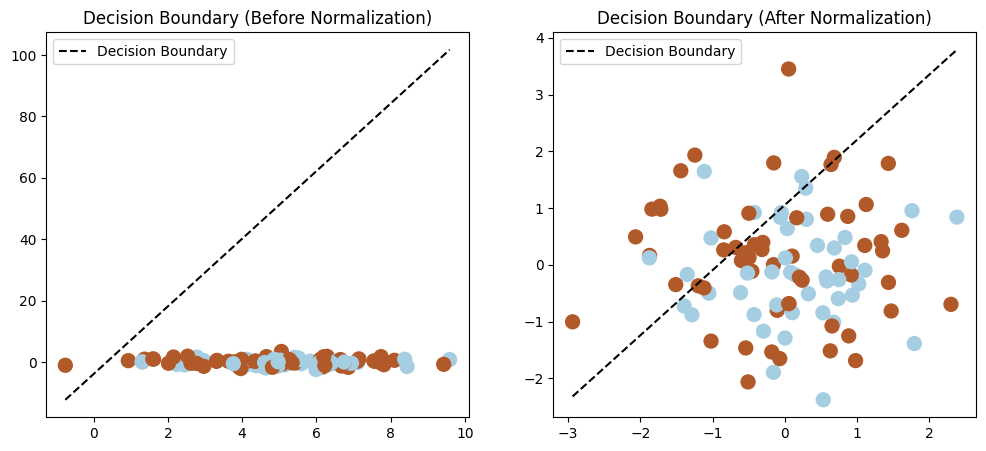

Accuracy Before Normalization: 45.00%
Accuracy After Normalization: 54.00%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def perceptron(inputs, weights, bias):
    return 1 if np.dot(inputs, weights) + bias > 0 else 0

def train_perceptron(inputs, targets, learning_rate=0.1, epochs=10):
    num_inputs = len(inputs[0])
    weights = np.random.rand(num_inputs)
    bias = np.random.rand()

    for epoch in range(epochs):
        for i in range(len(inputs)):
            prediction = perceptron(inputs[i], weights, bias)
            error = targets[i] - prediction
            weights += learning_rate * error * inputs[i]
            bias += learning_rate * error

    return weights, bias

np.random.seed(40)
num_samples = 100
feature1 = np.random.normal(loc=5, scale=2, size=num_samples)
feature2 = np.random.normal(loc=0, scale=1, size=num_samples)
inputs = np.column_stack((feature1, feature2))
targets = np.random.randint(2, size=num_samples)

weights_before, bias_before = train_perceptron(inputs, targets)

scaler = StandardScaler()
inputs_normalized = scaler.fit_transform(inputs)
weights_after, bias_after = train_perceptron(inputs_normalized, targets)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap=plt.cm.Paired, marker='o', s=100)
plt.title("Decision Boundary (Before Normalization)")
x_values = np.linspace(np.min(inputs[:, 0]), np.max(inputs[:, 0]), 100)
y_values_before = (-weights_before[0] / weights_before[1]) * x_values - (bias_before / weights_before[1])
plt.plot(x_values, y_values_before, label="Decision Boundary", linestyle="--", color="black")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(inputs_normalized[:, 0], inputs_normalized[:, 1], c=targets, cmap=plt.cm.Paired, marker='o', s=100)
plt.title("Decision Boundary (After Normalization)")
x_values_normalized = np.linspace(np.min(inputs_normalized[:, 0]), np.max(inputs_normalized[:, 0]), 100)
y_values_after = (-weights_after[0] / weights_after[1]) * x_values_normalized - (bias_after / weights_after[1])
plt.plot(x_values_normalized, y_values_after, label="Decision Boundary", linestyle="--", color="black")
plt.legend()

plt.show()

predictions_before = np.array([perceptron(x, weights_before, bias_before) for x in inputs])
accuracy_before = accuracy_score(targets, predictions_before)

inputs_normalized_test = scaler.transform(inputs)  # Use the same scaler on the test set
predictions_after = np.array([perceptron(x, weights_after, bias_after) for x in inputs_normalized_test])
accuracy_after = accuracy_score(targets, predictions_after)

print(f"Accuracy Before Normalization: {accuracy_before:.2%}")
print(f"Accuracy After Normalization: {accuracy_after:.2%}")